# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Gesang Nur Zamroji
- **Email:** gesang.23145@mhs.unesa.ac.id
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 :  Bagaimana pengaruh kondisi cuaca dan musim terhadap jumlah peminjaman sepeda harian?
- Pertanyaan 2 : Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?
- Pertanyaan 3 : Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv(r'data\day.csv')
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- day_df/ dataset day.csv berisi data peminjaman sepeda harian, mengapa saya hanya memilih day, karene lebih sesuai untuk analisis tren dan perilaku pengguna.

### Assessing Data

.info -> memberikan informasi mengenai jumlah baris data , kolom/fitur apa saja yang ada didataset , serta jenis/ type data dari setiap kolom

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


.isna().sum() -> untuk mengetahui jumlah missing value /nilai null/na/kosong , pada setiap kolom, hasil menunjukan tidak ada missing value

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

.duplicated().sum() -> untuk mengetahui jumlah data duplikat/ data yang sama pada dataset, hasil menunjukan tidak ada data duplikat

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


.describe() -> menunjukan deskripsi satistik dari data , seprti min, max , std, mean, Q1, Q2,Q3 dll

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value , tidak ada data duplicate
- Masi ada beberapa penamaan kolom yang mungkin bisa diperbaiki agar lebih mudah dipahami

### Cleaning Data

melakukan rename kolom agar lebih mudah dipahami

In [7]:
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'atemp': 'feels_like_temp',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users'
})

day_df.head(1)


,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


- melakukan konversi type data kolom date menjadi type data date time
- melakukan mapping untuk kolom year , agar mudah interpretasinya/ dipahaminya

In [8]:
day_df['date'] = pd.to_datetime(day_df['date'])
day_df['year'] = day_df['year'].map({0: 2011, 1: 2012})
day_df.head(1)



,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


dengan berpedoman pada readme, dilakukan konversi balik dari nilai yang sudah di standarisasi

In [9]:
day_df['temp_celsius'] = day_df['temp'] * 41
day_df['feels_like_celsius'] = day_df['feels_like_temp'] * 50
day_df['humidity_percent'] = day_df['humidity'] * 100
day_df['wind_speed_kmh'] = day_df['wind_speed'] * 67
day_df.head(1)



,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_rentals,temp_celsius,feels_like_celsius,humidity_percent,wind_speed_kmh
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,80.5833,10.749882


melakukan mapping pada beberapa kolom agar mudah dipamai saat inter pretasi :
- season
- weather_condition
- weekday
- month
- workingday
- holiday

In [10]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season_label'] = day_df['season'].map(season_map).astype('category')

weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}
day_df['weather_label'] = day_df['weather_condition'].map(weather_map).astype('category')

weekday_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['weekday_label'] = day_df['weekday'].map(weekday_map)

month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
day_df['month_label'] = day_df['month'].map(month_map)

day_df['workingday_label'] = day_df['workingday'].map({
    0: 'Non-working day',
    1: 'Working day'
})

day_df['holiday_label'] = day_df['holiday'].map({
    0: 'No',
    1: 'Yes'
})

day_df.head(1)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,...,temp_celsius,feels_like_celsius,humidity_percent,wind_speed_kmh,season_label,weather_label,weekday_label,month_label,workingday_label,holiday_label
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,...,14.110847,18.18125,80.5833,10.749882,Spring,Mist/Cloudy,Saturday,Jan,Non-working day,No


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             731 non-null    int64         
 1   date                731 non-null    datetime64[ns]
 2   season              731 non-null    int64         
 3   year                731 non-null    int64         
 4   month               731 non-null    int64         
 5   holiday             731 non-null    int64         
 6   weekday             731 non-null    int64         
 7   workingday          731 non-null    int64         
 8   weather_condition   731 non-null    int64         
 9   temp                731 non-null    float64       
 10  feels_like_temp     731 non-null    float64       
 11  humidity            731 non-null    float64       
 12  wind_speed          731 non-null    float64       
 13  casual_users        731 non-null    int64         

**Insight:**
- Data cleaning dilakukan dengan memperjelas nama kolom, memperbaiki tipe data, mengonversi variabel cuaca yang ternormalisasi ke satuan aslinya, serta memetakan variabel kategorikal ke label yang lebih deskriptif. Langkah ini bertujuan untuk meningkatkan keterbacaan data dan mempermudah proses analisis serta visualisasi.


## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,...,temp_celsius,feels_like_celsius,humidity_percent,wind_speed_kmh,season_label,weather_label,weekday_label,month_label,workingday_label,holiday_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731,731,731,731,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,7,12,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Fall,Clear,Saturday,Jan,Working day,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,188,463,105,62,500,710
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,20.310776,23.717699,62.789406,12.762576,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,2.424346,3.953480,0.000000,1.500244,NaN,NaN,NaN,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,13.820424,16.892125,52.000000,9.041650,NaN,NaN,NaN,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,...,20.431653,24.336650,62.666700,12.125325,NaN,NaN,NaN,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,...,26.872076,30.430100,73.020850,15.625371,NaN,NaN,NaN,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,35.328347,42.044800,97.250000,34.000021,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
day_df['total_rentals'].describe()


count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_rentals, dtype: float64

- Rata-rata jumlah peminjaman sepeda per hari adalah sekitar 4.504 unit.
- Nilai tengah (median) sebesar 4.548, yang relatif dekat dengan nilai rata-rata, menunjukkan distribusi data yang cukup seimbang.
- Standar deviasi sebesar 1.937 mengindikasikan adanya variasi yang cukup besar dalam jumlah peminjaman sepeda antar hari.
- Jumlah peminjaman terendah tercatat sebesar 22, sedangkan nilai tertinggi mencapai 8.714, menunjukkan rentang nilai yang sangat lebar.

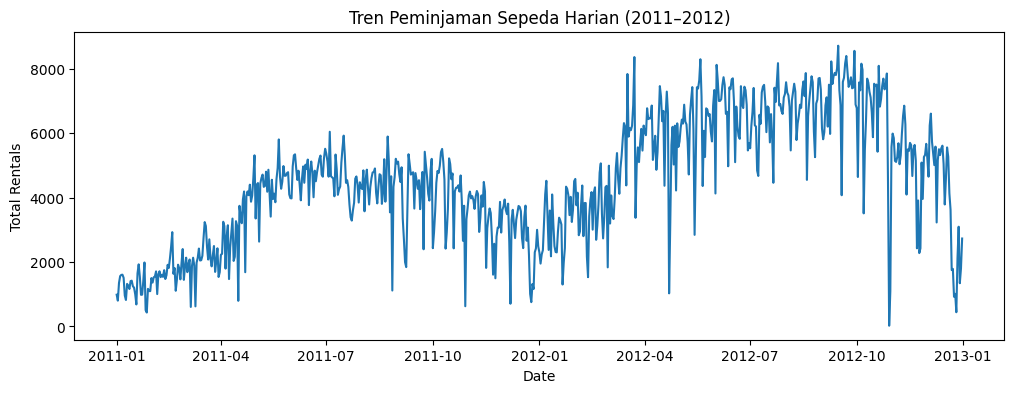

In [32]:
plt.figure(figsize=(12,4))
plt.plot(day_df['date'], day_df['total_rentals'])
plt.title('Tren Peminjaman Sepeda Harian (2011–2012)')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.show()


Berdasarkan visualisasi tren peminjaman sepeda harian selama periode 2011–2013, terlihat adanya pola musiman (seasonality) yang cukup jelas serta fluktuasi jumlah peminjaman dari waktu ke waktu.


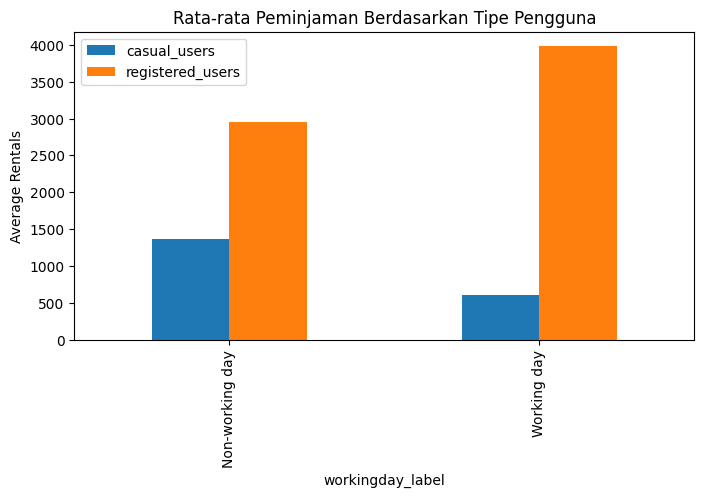

In [16]:
day_df[['casual_users', 'registered_users']].mean()
day_df.groupby('workingday_label')[['casual_users', 'registered_users']].mean().plot(
    kind='bar',
    figsize=(8,4)
)
plt.title('Rata-rata Peminjaman Berdasarkan Tipe Pengguna')
plt.ylabel('Average Rentals')
plt.show()


Pengguna terdaftar (registered users) mendominasi jumlah peminjaman baik pada hari kerja maupun hari non-kerja. Sementara itu, pengguna kasual menunjukkan rata-rata peminjaman yang lebih tinggi pada hari non-kerja dibandingkan hari kerja, yang mengindikasikan bahwa pengguna kasual lebih aktif pada waktu luang seperti akhir pekan atau hari libur.


**Insight:**
- mohon maafinsigt telah saya letakan dibawah gambar

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca dan musim terhadap jumlah peminjaman sepeda harian?


C:\Users\User\AppData\Local\Temp\ipykernel_1144\3315120338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season_label')['total_rentals'].mean().sort_values()


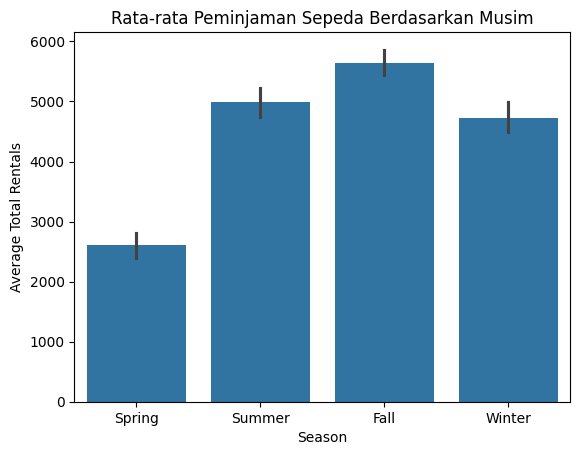

In [13]:
day_df.groupby('season_label')['total_rentals'].mean().sort_values()
sns.barplot(
    x='season_label',
    y='total_rentals',
    data=day_df,
    order=['Spring', 'Summer', 'Fall', 'Winter']
)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Average Total Rentals')
plt.show()


Berdasarkan rata-rata peminjaman sepeda per musim, terlihat bahwa jumlah peminjaman tertinggi terjadi pada musim gugur (fall), diikuti oleh musim panas (summer). Sementara itu, musim semi (spring) menunjukkan jumlah peminjaman paling rendah. Pola ini mengindikasikan bahwa kondisi musim yang cenderung stabil dan nyaman, seperti pada musim panas dan gugur, mendorong peningkatan aktivitas bersepeda, sedangkan kondisi transisi atau suhu yang lebih rendah berdampak pada penurunan permintaan.


C:\Users\User\AppData\Local\Temp\ipykernel_1144\2643913099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weather_label')['total_rentals'].mean().sort_values()


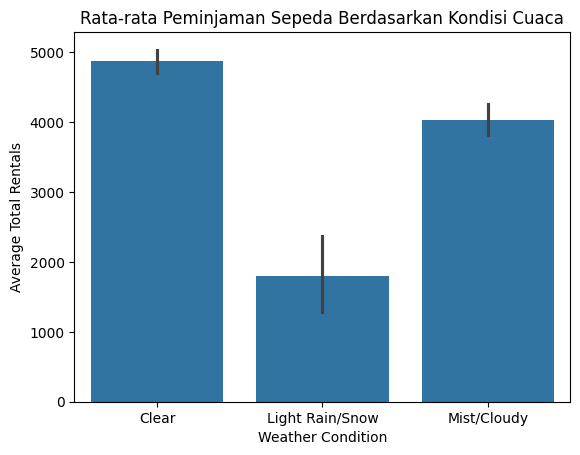

In [14]:
day_df.groupby('weather_label')['total_rentals'].mean().sort_values()
sns.barplot(
    x='weather_label',
    y='total_rentals',
    data=day_df
)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Rentals')
plt.show()


Dari sisi kondisi cuaca, peminjaman sepeda paling tinggi terjadi saat cuaca cerah (clear). Jumlah peminjaman menurun pada kondisi mist/cloudy, dan mengalami penurunan signifikan saat terjadi hujan atau salju ringan (light rain/snow). Hal ini menunjukkan bahwa kondisi cuaca memiliki pengaruh langsung terhadap kenyamanan dan keputusan pengguna dalam menggunakan sepeda sebagai moda transportasi atau aktivitas rekreasi.


Secara keseluruhan, musim dan kondisi cuaca berpengaruh signifikan terhadap jumlah peminjaman sepeda harian. Peminjaman cenderung meningkat pada musim dan kondisi cuaca yang lebih nyaman, serta menurun ketika cuaca kurang mendukung aktivitas luar ruangan.

### Pertanyaan 2: Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?

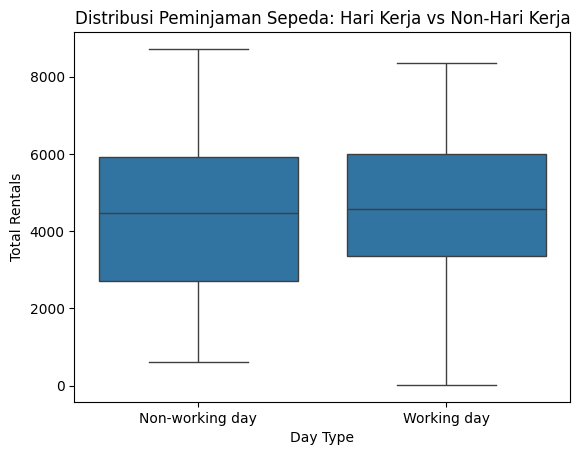

In [15]:
sns.boxplot(
    x='workingday_label',
    y='total_rentals',
    data=day_df
)
plt.title('Distribusi Peminjaman Sepeda: Hari Kerja vs Non-Hari Kerja')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()


**Insight:**
- Berdasarkan distribusi peminjaman sepeda antara hari kerja dan non-hari kerja, terlihat bahwa median jumlah peminjaman pada hari kerja sedikit lebih tinggi dibandingkan hari non-kerja. Selain itu, distribusi pada hari kerja cenderung lebih konsisten, meskipun tetap terdapat variasi dan beberapa nilai ekstrem. Sementara itu, pada hari non-kerja, variasi peminjaman terlihat lebih lebar, yang mengindikasikan bahwa jumlah peminjaman pada hari libur lebih dipengaruhi oleh faktor situasional seperti cuaca atau aktivitas rekreasi.

- Terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur. Hari kerja menunjukkan peminjaman yang lebih stabil dan konsisten, sedangkan hari libur memiliki tingkat variasi yang lebih tinggi dalam jumlah peminjaman.

### Pertanyaan 3:  Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda harian?


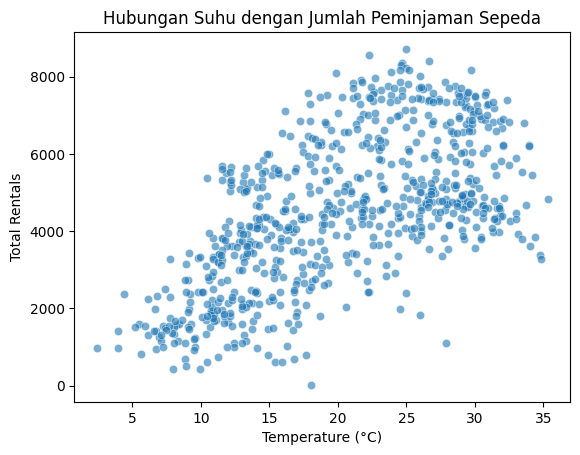

In [17]:
sns.scatterplot(
    x='temp_celsius',
    y='total_rentals',
    data=day_df,
    alpha=0.6
)
plt.title('Hubungan Suhu dengan Jumlah Peminjaman Sepeda')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Rentals')
plt.show()


Terdapat kecenderungan peningkatan jumlah peminjaman sepeda seiring dengan meningkatnya suhu. Hal ini menunjukkan bahwa kondisi cuaca yang lebih hangat mendorong aktivitas luar ruangan, sehingga minat masyarakat untuk menggunakan sepeda menjadi lebih tinggi. Sebaliknya, pada suhu yang lebih rendah, jumlah peminjaman cenderung menurun, yang mengindikasikan bahwa suhu merupakan salah satu faktor penting yang memengaruhi tingkat permintaan peminjaman sepeda.


## Analisis Lanjutan (Opsional)

Metode: Manual Grouping dengan Binning

Clustering dilakukan dengan mengelompokkan hari berdasarkan tingkat permintaan sepeda (total_rentals) ke dalam beberapa kategori permintaan.

- Low Demand: jumlah penyewaan rendah
- Medium Demand: jumlah penyewaan sedang
- High Demand: jumlah penyewaan tinggi

Pendekatan ini bertujuan untuk membantu memahami pola permintaan sepeda harian dan mendukung pengambilan keputusan operasional.

In [18]:
day_df['demand_level'] = pd.cut(
    day_df['total_rentals'],
    bins=[0, 1000, 3000, day_df['total_rentals'].max()],
    labels=['Low', 'Medium', 'High']
)


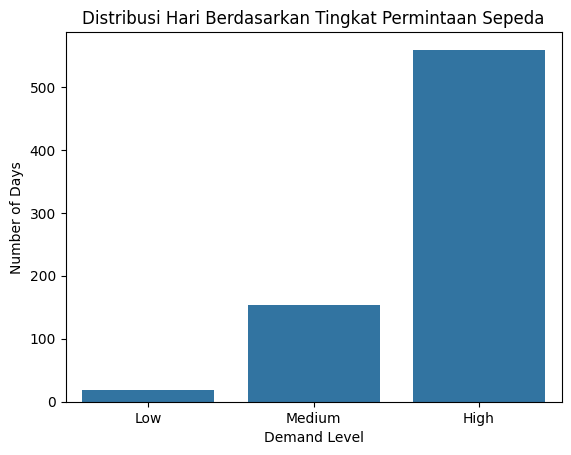

In [21]:
sns.countplot(
    x='demand_level',
    data=day_df,
    order=['Low', 'Medium', 'High']
)
plt.title('Distribusi Hari Berdasarkan Tingkat Permintaan Sepeda')
plt.xlabel('Demand Level')
plt.ylabel('Number of Days')
plt.show()


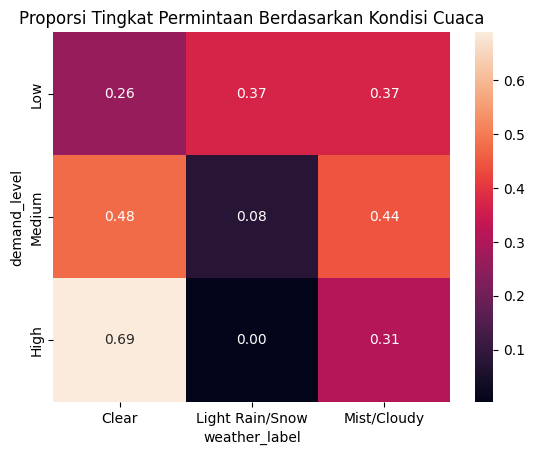

In [22]:
pd.crosstab(
    day_df['demand_level'],
    day_df['weather_label'],
    normalize='index'
)
sns.heatmap(
    pd.crosstab(day_df['demand_level'], day_df['weather_label'], normalize='index'),
    annot=True,
    fmt='.2f'
)
plt.title('Proporsi Tingkat Permintaan Berdasarkan Kondisi Cuaca')
plt.show()


Hasil manual grouping dengan metode binning dan heatmap menunjukkan bahwa kelompok High Demand merepresentasikan hari-hari dengan tingkat peminjaman sepeda tertinggi, yang umumnya terjadi pada kondisi cuaca dan musim yang mendukung aktivitas luar ruangan. Kelompok Medium Demand mencerminkan hari dengan permintaan yang stabil dan moderat, yang dapat dianggap sebagai kondisi operasional normal. Sementara itu, kelompok Low Demand menunjukkan hari-hari dengan tingkat peminjaman paling rendah, yang berpotensi dipengaruhi oleh faktor seperti cuaca buruk atau kondisi tertentu yang membatasi mobilitas. Pengelompokan ini membantu mengidentifikasi prioritas pengelolaan armada dan strategi operasional berdasarkan tingkat permintaan.

## Conclusion

- Conclution pertanyaan 1:

Kondisi cuaca dan musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda harian. Peminjaman cenderung lebih tinggi pada musim dengan suhu hangat dan kondisi cuaca cerah, sementara cuaca buruk seperti hujan atau salju berkaitan dengan penurunan jumlah peminjaman.

- Conclution pertanyaan 2:

Kondisi cuaca dan musim memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda harian. Peminjaman cenderung lebih tinggi pada musim dengan suhu hangat dan kondisi cuaca cerah, sementara cuaca buruk seperti hujan atau salju berkaitan dengan penurunan jumlah peminjaman.

- Conclution pertanyaan 3:

Suhu memiliki pengaruh positif terhadap jumlah peminjaman sepeda harian. Semakin tinggi suhu, jumlah peminjaman cenderung meningkat, yang menunjukkan bahwa kondisi cuaca hangat lebih mendukung aktivitas bersepeda. Hal ini menegaskan bahwa suhu merupakan salah satu faktor penting yang perlu dipertimbangkan dalam perencanaan operasional dan pengelolaan ketersediaan sepeda.